In [1]:
%pip install xlrd
%pip install matplotlib
%pip install seaborn
%pip install --upgrade pandas
from ipywidgets import interactive, fixed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))


seaborn==0.11.1
pandas==1.2.2
numpy==1.20.1
matplotlib==3.3.4
ipywidgets==7.6.3


In [3]:
df = pd.read_csv("1997_Vernik_Liu_AppendixA.csv")

In [4]:
df.head()

,form,depth_ft,depth_m,por,b_den,ker,vp0,vp90,vs0,vs90,eps,gam,del
0,Bakken,7570,2307,1.97,2.09,0.423,3.13,3.94,1.88,2.30,0.29,0.25,NaN
1,Bakken,8630,2630,0.70,1.99,0.500,NaN,3.93,NaN,2.31,NaN,NaN,NaN
2,Bakken,8634,2632,0.65,2.06,0.409,3.02,4.14,1.76,2.50,0.44,0.51,0.03
3,Bakken,9831,2996,0.70,2.21,0.272,3.41,4.16,2.07,2.51,0.24,0.24,0.12
4,Bakken,10164,3098,0.68,2.22,0.323,3.38,4.19,2.12,2.57,0.27,0.23,0.04


In [5]:
df = df[df['eps'].notna()]

In [6]:
df.head()

,form,depth_ft,depth_m,por,b_den,ker,vp0,vp90,vs0,vs90,eps,gam,del
0,Bakken,7570,2307,1.97,2.09,0.423,3.13,3.94,1.88,2.30,0.29,0.25,NaN
2,Bakken,8634,2632,0.65,2.06,0.409,3.02,4.14,1.76,2.50,0.44,0.51,0.03
3,Bakken,9831,2996,0.70,2.21,0.272,3.41,4.16,2.07,2.51,0.24,0.24,0.12
4,Bakken,10164,3098,0.68,2.22,0.323,3.38,4.19,2.12,2.57,0.27,0.23,0.04
5,Bakken,10487,3196,0.70,2.18,0.404,3.18,4.20,1.93,2.51,0.37,0.35,NaN


<AxesSubplot:>

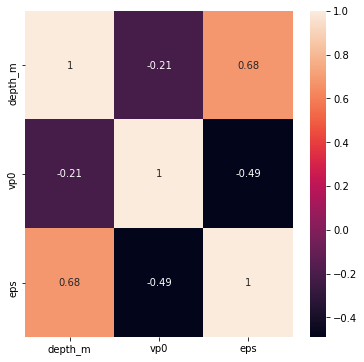

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(df[["depth_m","vp0","eps"]].corr(),annot=True)

<AxesSubplot:xlabel='vp0', ylabel='eps'>

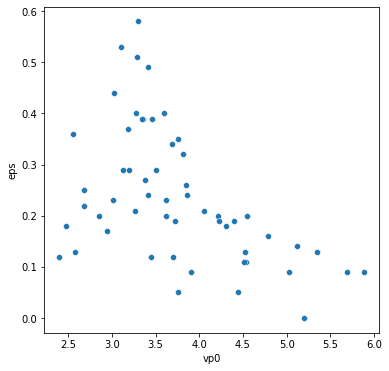

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="vp0",y="eps",data=df)

In [9]:
from scipy.optimize import curve_fit

def power_law(x, a, b ):
    return a * np.power(x, -b) 

In [10]:
popt , pcov = curve_fit( power_law , df.vp0 , df.eps )
print(popt)

[0.76274678 0.90500818]


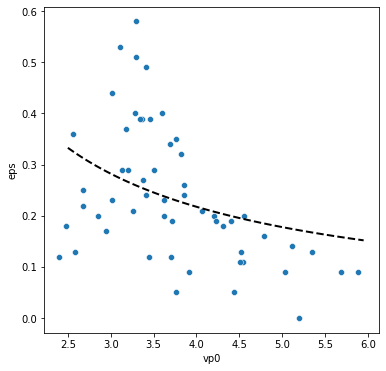

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="vp0",y="eps",data=df)
x_fit = [2.5+x*0.05 for x in range(0,70)]
plt.plot(x_fit,power_law(x_fit,popt[0],popt[1]), '--',
        color = 'k',
        linewidth = 2)

In [12]:
print (np.mean((df.eps-power_law(df.vp0, *popt))**2))


0.01440527937363546


In [13]:
from scipy.optimize import curve_fit

def power_law3d(x, a, b , c ):
    return a * np.power(x[0], b) * np.power(x[1], c) 

In [14]:
popt3d , pcov3d = curve_fit( power_law3d , [df.vp0,df.depth_m] , df.eps )
print(popt3d)

[ 0.01029597 -1.94014529  0.72611043]


In [15]:
print (np.mean((df.eps-power_law3d([df.vp0,df.depth_m], *popt3d))**2))


0.008424590796600349


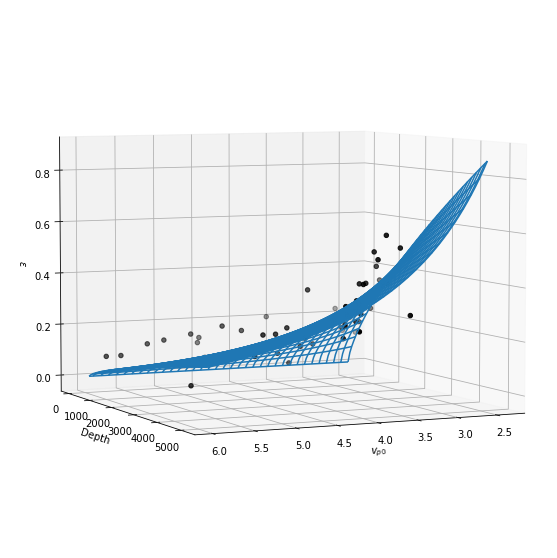

In [16]:
x_fit3d = [2.5+x*0.05 for x in range(0,70)]
y_fit3d = [    y*75   for y in range(0,70)]
x_fit3d , y_fit3d = np.meshgrid( x_fit3d , y_fit3d )

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.set_xlabel('$v_{p0}$')
ax.set_ylabel('Depth')
ax.set_zlabel('$\epsilon$')
ax.scatter(df["vp0"],df["depth_m"],df["eps"] , color = 'k')

surf = ax.plot_wireframe(x_fit3d, y_fit3d, power_law3d([x_fit3d, y_fit3d] , *popt3d))
ax.view_init(5, 65)